In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import yaml
#from dotenv import load_dotenv

import Mandelbrot #defined/customized functions from Mandelbrot.py

import scipy
from scipy.stats import norm, cauchy, lognorm, expon, kstest
from scipy.stats import linregress



In [2]:
MIN = Mandelbrot.process_csv(gran="min")
HOUR = Mandelbrot.process_csv(gran="hour")
DAY = Mandelbrot.process_csv(gran="day")
WEEK = Mandelbrot.process_csv(gran="week")
MONTH = Mandelbrot.process_csv(gran="month")

# Hurst exponent


H shows longterm trends in timeseries (longterm memory)

H = 0.5 : random walk (brownian motion)
H < 0.5 : mean reverting (zigzack motion, change in trend)
H > 0.5 : presistence of the current trend (following the current trends of up or downward movement)


## 2 Methods of estimating H


### Rescaled Range analysis (R/S Analysis)

power law relationship
R/S ~ l^H
R/S = C*l^H

l = length of segment
R/S = recaled range
C = Constant
H = Hurst exponent

---> the rescaled range relates to the length with power of the hurst

To calculate the Hurst we need to get the log of the equation:
log(R/S) = log(C)+log(l)*H    ---> product rule for log:log(c)+log(l^H) | power rule for log: log(l^H)=H*log(l)

now we can estimate the linear relationship (Y = m*x+b)
x = log(l)
b = log(c) (intercept)
m = H (slope)
Y = log(R/S)


divide dataset in subsets
calculate cum std from mean
calculate difference of cum std (Max-Min) (R)
calculate std (S)

plot (log(R/S))/log(n) (for different n)
slope == Hurst exponent


### Detrended Fluctuation Analysis (DFA)

(more robust for trends)






In [3]:
data = DAY["high"]
len(data)

3393

In [19]:
np.cumsum?

In [4]:
a = [1,2,3]
np.sum(a[0:1])

1

In [13]:
[mean]*3

[311.5562572479248, 311.5562572479248, 311.5562572479248]

data gets divided into 106 subsets of length 32
---------------------------------------------------------------------------------------------
calculating for the 0.segment
calculating for index 0 to 32
mean: 311.5562572479248 std: 21.964691642719462


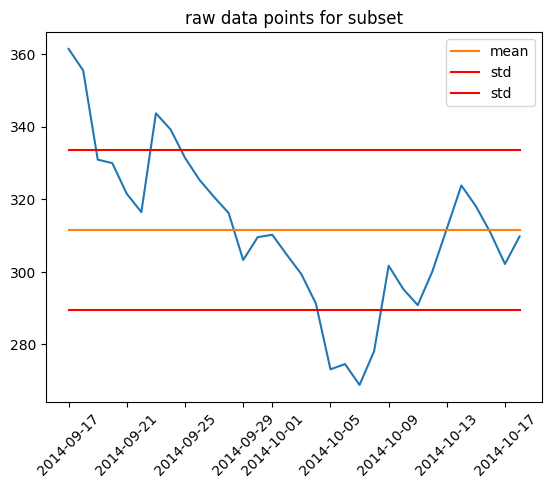

/tmp/ipykernel_4924/3192932761.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


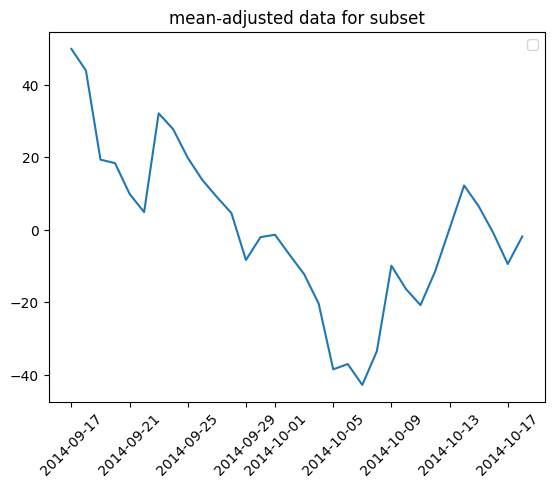

cumulative sum of centralized data: [49.912248611450195, 93.86139297485352, 113.24184226989746, 131.66376495361328, 141.61202430725098, 146.52488327026367, 178.673002243042, 206.42430114746088, 226.31271553039545, 240.09593582153315, 249.16968345642084, 253.82302093505854, 245.53473854064936, 243.54061508178705, 242.208662033081, 235.34494018554682, 223.14274787902826, 202.82660293579096, 164.38341331481928, 127.3967666625976, 84.65746498107904, 51.20826339721674, 41.343656539916935, 25.069229125976506, 4.334291458129826, -7.180034637451286, -6.819513320922965, 5.43892669677723, 11.974405288696119, 11.184932708740064, 1.7984752655027592, -1.7053025658242404e-13]
the range of the cumulative sum is: 261.0030555725098


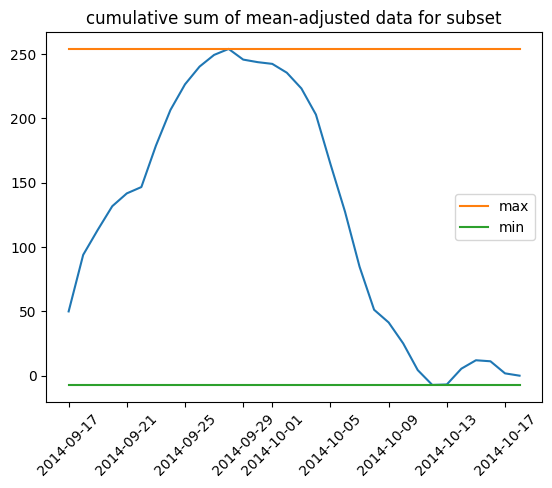

the rescaled Range of segment 0 is: 11.88284633438154
---------------------------------------------------------------------------------------------
calculating for the 1.segment
calculating for index 32 to 64
mean: 297.1629333496094 std: 23.999264471677524


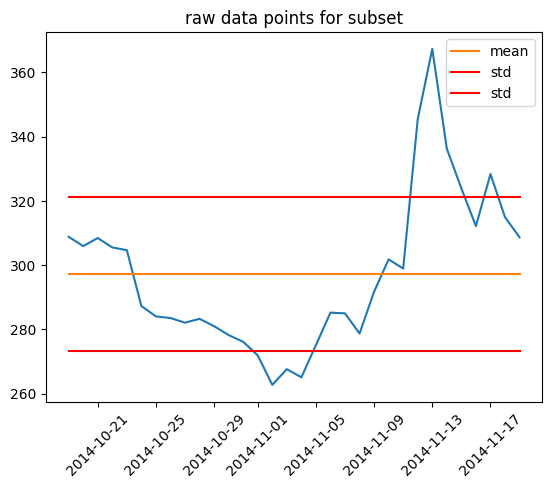

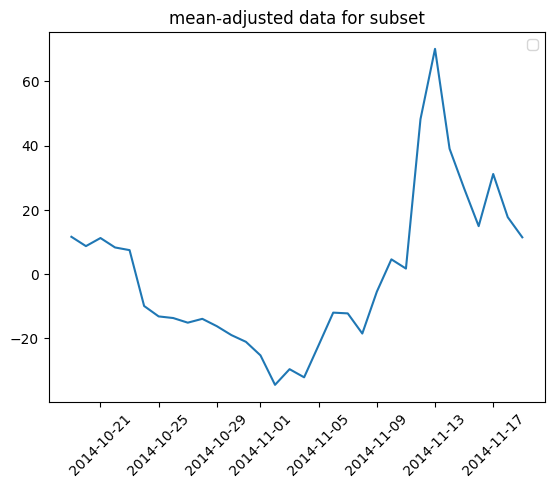

cumulative sum of centralized data: [11.6392822265625, 20.376617431640625, 31.63092041015625, 39.952239990234375, 47.44000244140625, 37.54742431640625, 24.4105224609375, 10.768524169921818, -4.317962646484432, -18.207366943359432, -34.38638305664068, -53.33398437500006, -74.38027954101574, -99.64205932617199, -134.0694580078126, -163.6240234375001, -195.7126464843751, -217.7842712402345, -229.7452087402345, -241.9412841796876, -260.408416748047, -265.853729248047, -261.2324218750001, -259.482147216797, -211.24038696289074, -141.11285400390636, -102.06726074218761, -75.35189819335949, -60.399963378906364, -29.21981811523449, -11.478637695312614, -1.1368683772161603e-13]
the range of the cumulative sum is: 313.29373168945324


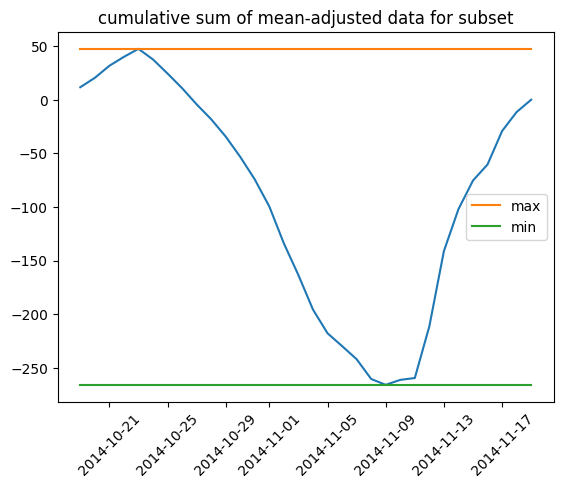

the rescaled Range of segment 1 is: 13.05430556253853
---------------------------------------------------------------------------------------------
calculating for the 2.segment
calculating for index 64 to 96
mean: 294.1600008010864 std: 16.05772153516414


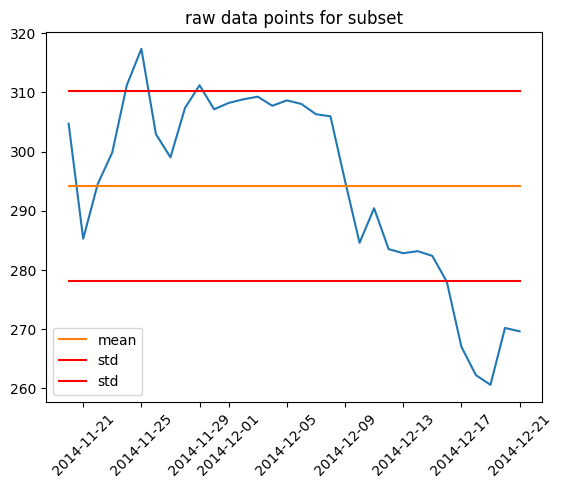

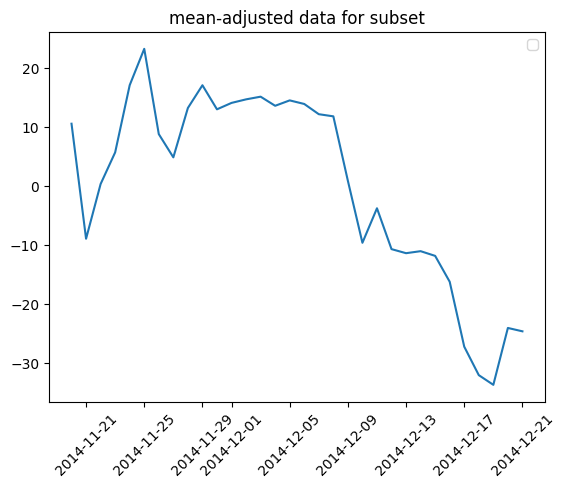

cumulative sum of centralized data: [10.558016777038574, 1.6514949798583984, 2.0031213760375977, 7.709697723388672, 24.78593349456787, 48.011735916137695, 56.809956550598145, 61.676109313964844, 74.89306163787842, 91.95919609069824, 104.95111179351807, 119.02762222290039, 133.7039556503296, 148.83497047424316, 162.42448139190674, 176.9270782470703, 190.82405376434326, 202.99098777770996, 214.79436588287354, 215.69082260131836, 206.1015920639038, 202.35144233703613, 191.68915271759033, 180.3389663696289, 169.3301191329956, 157.52564811706543, 141.34266757965088, 114.17500686645508, 82.19124507904053, 48.56862831115723, 24.568936347961426, 0.0]
the range of the cumulative sum is: 215.69082260131836


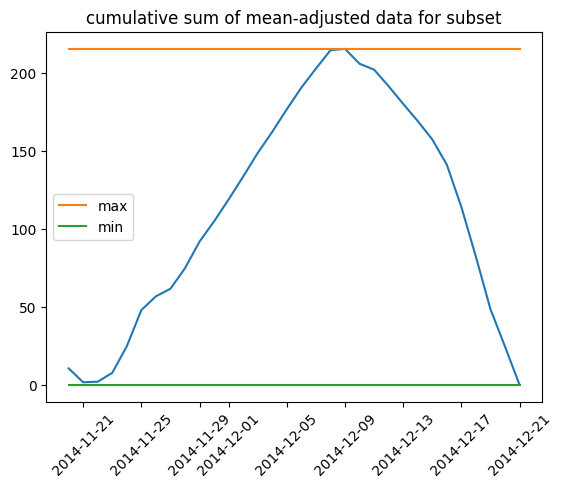

the rescaled Range of segment 2 is: 13.432218395927837
The average rescaled Range for the segments of lenth 32 is: 12.789790097615969
The Hurst exponent for the segments of lenth 32 is: 0.7353841364404061


In [22]:
#R/S approach step by step (fixed window)

#select a segmentlenth (l) and divide data in n substes of length l
#dive by the power of 2

#define chunk size (by the power of two)
power=5
l = 2**power         #length of subsets
n = int(len(data)/l)      #number of subsets

print(f"data gets divided into {n} subsets of length {l}")

R_S_per_segment = []   #list of R/S for each segment 

#for k in range(0,n):
for k in range(0,3):
    print("---------------------------------------------------------------------------------------------")
    print(f"calculating for the {k}.segment")
    index_range = [k*l,((k+1)*l)]
    print(f"calculating for index {index_range[0]} to {index_range[1]}")
    
    #get the mean
    mean = np.average(data[index_range[0]:index_range[1]])
    #get the standartdeviation
    std = np.std(data[index_range[0]:index_range[1]])
    print("mean:",mean,"std:",std)
    
    plt.plot(DAY["date"][k*l:((k+1)*l)],data[k*l:((k+1)*l)])
    plt.plot(DAY["date"][k*l:((k+1)*l)], [mean]*len(data[k*l:((k+1)*l)]), label ='mean')
    plt.plot(DAY["date"][k*l:((k+1)*l)], [mean-std]*len(data[k*l:((k+1)*l)]),color='red', label ='std')
    plt.plot(DAY["date"][k*l:((k+1)*l)], [mean+std]*len(data[k*l:((k+1)*l)]),color='red', label ='std')
    plt.title("raw data points for subset")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
    
    #get a mean-adjusted subset (mean substracted from each datapoint)
    Y = []
    for i in range(index_range[0],index_range[1]):
        y = data[i]-mean
        #print(data[i],"-",mean,"=",y)
        Y.append(y)
        #print(np.sum(Y))
    plt.plot(DAY["date"][k*l:((k+1)*l)],Y)
    plt.title("mean-adjusted data for subset")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
    
    #get the cumulative sum of Y
    Y_cumsum = []
    for j in range(1,len(Y)+1):
        y_cumsum = np.sum(Y[0:j])
        Y_cumsum.append(y_cumsum)
        
    print("cumulative sum of centralized data:", Y_cumsum)
    
    #calculate Range of the cumulative sum
    R = np.max(Y_cumsum)-np.min(Y_cumsum)
    print("the range of the cumulative sum is:", R)
    
    plt.plot(DAY["date"][k*l:((k+1)*l)],Y_cumsum)
    plt.plot(DAY["date"][k*l:((k+1)*l)], [np.max(Y_cumsum)]*len(data[k*l:((k+1)*l)]), label ='max')
    plt.plot(DAY["date"][k*l:((k+1)*l)], [np.min(Y_cumsum)]*len(data[k*l:((k+1)*l)]), label ='min')
    plt.title("cumulative sum of mean-adjusted data for subset")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
    
    #calculate rescaled Range (is calculated per subset k)
    R_S = R/std
    R_S_per_segment.append(R_S)
    print(f"the rescaled Range of segment {k} is:", R_S)
    
    
    
# get the mean of the R/S for all segments of the length l
R_S_mean = np.average(R_S_per_segment)
Hurst = np.log(R_S_mean)/np.log(l)

print(f"The average rescaled Range for the segments of lenth {l} is:",R_S_mean)
print(f"The Hurst exponent for the segments of lenth {l} is:",Hurst)
    
    

#Repeat for different subsets lengths l and calculate the R_S mean
    

    





In [18]:
Y_cumsum

[10.558016777038574,
 1.6514949798583984,
 2.0031213760375977,
 7.709697723388672,
 24.78593349456787,
 48.011735916137695,
 56.809956550598145,
 61.676109313964844,
 74.89306163787842,
 91.95919609069824,
 104.95111179351807,
 119.02762222290039,
 133.7039556503296,
 148.83497047424316,
 162.42448139190674,
 176.9270782470703,
 190.82405376434326,
 202.99098777770996,
 214.79436588287354,
 215.69082260131836,
 206.1015920639038,
 202.35144233703613,
 191.68915271759033,
 180.3389663696289,
 169.3301191329956,
 157.52564811706543,
 141.34266757965088,
 114.17500686645508,
 82.19124507904053,
 48.56862831115723,
 24.568936347961426,
 0.0]

In [93]:
#all the steps above are condensed is a small function:


def rescaled_range(data,power):
    l = 2**power         #length of subsets
    n = int(len(data)/l)      #number of subsets
    print(f"data gets divided into {n} subsets of length {l}")
    
    R_S_per_segment = [] 
    
    for k in range(0,n):
        index_range = [k*l,((k+1)*l)]
        subset = data[index_range[0]:index_range[1]]
    
        mean = np.average(data[index_range[0]:index_range[1]])
        std = np.std(subset)
        Y_cumsum = np.cumsum(subset- np.mean(subset))
        
        R = np.max(Y_cumsum)-np.min(Y_cumsum)
        R_S = R/std
        
        R_S_per_segment.append(R_S)
        
    
    R_S_mean = np.average(R_S_per_segment)
    #Hurst = np.log(R_S_mean)/np.log(l)
    
    return R_S_mean, l



In [91]:
R_S_mean, l = rescaled_range(data,power=5)


data gets divided into 106 subsets of length 32


In [94]:
def rs_fixed_window(data,power):
    
    
    L = []
    R_S_mean = []
    
    for p in range(2,power+1):
        r_s_mean ,l = rescaled_range(data, power=p)
        L.append(l)
        R_S_mean.append(r_s_mean)
        
        
    return R_S_mean,L

In [95]:
R_S_mean,L = rs_fixed_window(data, power=10)

data gets divided into 848 subsets of length 4
data gets divided into 424 subsets of length 8
data gets divided into 212 subsets of length 16
data gets divided into 106 subsets of length 32
data gets divided into 53 subsets of length 64
data gets divided into 26 subsets of length 128
data gets divided into 13 subsets of length 256
data gets divided into 6 subsets of length 512
data gets divided into 3 subsets of length 1024


In [96]:
def hurst(data,power,rolling_window="false"):
    
    if rolling_window == "false":
        R_S_mean, L = rs_fixed_window(data,power=power)
    else:
        print('rolling window not available yet')
    
    slope, intercept, r_value, p_value, std_err = linregress(np.log(L), np.log(R_S_mean))
    Y =[]
    #Hurst == slope
    #reconstructing fit
    for l in L:
        y = slope*np.log(l)+intercept
        Y.append(y)
    
    rescaled_range = [R_S_mean,L]
    fit = [slope,intercept,p_value]
    Hurst = slope
    
    return Hurst, Y, fit, rescaled_range
    

In [97]:
H, Y, fit, rescaled_range = hurst(data, power=10)

data gets divided into 848 subsets of length 4
data gets divided into 424 subsets of length 8
data gets divided into 212 subsets of length 16
data gets divided into 106 subsets of length 32
data gets divided into 53 subsets of length 64
data gets divided into 26 subsets of length 128
data gets divided into 13 subsets of length 256
data gets divided into 6 subsets of length 512
data gets divided into 3 subsets of length 1024


In [101]:
2**3

8

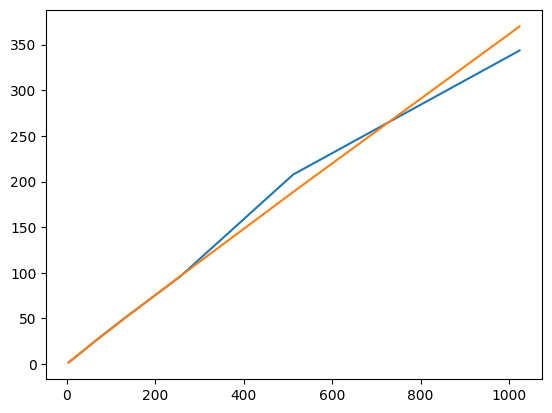

In [102]:
#Reconstruct the Hurst as exponent in the scaling law R/S = C*l^H

C = np.exp(fit[1])

plt.plot(rescaled_range[1],rescaled_range[0])
plt.plot(rescaled_range[1],C*L**H)
plt.show()

In [38]:
def hurst_exponent(R_S,l, H, intercept):
    C = np.exp(intercept)
    
    

0.9723525937186174


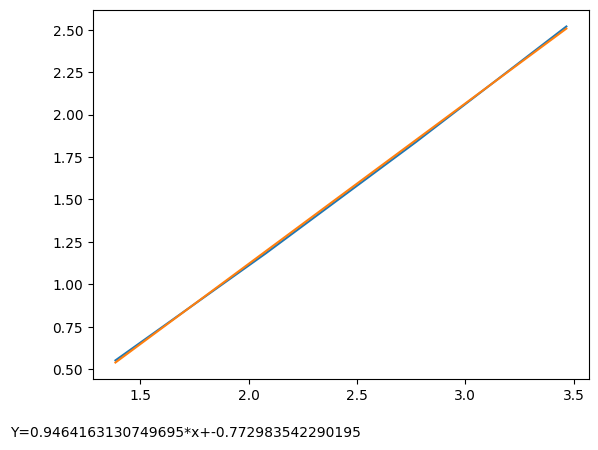

In [86]:
plt.plot(np.log(rescaled_range[1]),np.log(rescaled_range[0]))
plt.plot(np.log(rescaled_range[1]), Y, label="linear fit")
plt.text(x=0.9,y=0.1,s=f"Y={H}*x+{fit[1]}")
plt.show()

In [73]:
plt.text?

In [ ]:
def hurst_rolling_window():